# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
#Type your code here
import os
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import joblib


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
#Type your code here
df = pd.read_csv('../dataset/forminator-career-form-250124070425.csv')


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
#Type your code here
# Basic information
print(f"Dataset shape: {df.shape}")
print(df.info())
print(df.describe())

Dataset shape: (245, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Submission Time               245 non-null    object
 1   Full name                     245 non-null    object
 2   Marital status                245 non-null    object
 3   Gender                        245 non-null    object
 4   Religion                      245 non-null    object
 5   Date of birth                 245 non-null    object
 6   Current address               245 non-null    object
 7   Highest formal of education   245 non-null    object
 8   Faculty/Major                 245 non-null    object
 9   School/University name        245 non-null    object
 10  Email address                 245 non-null    object
 11  WhatsApp number               245 non-null    object
 12  Desired positions             244 non-null    object


In [4]:
# Check missing values
missing_values = df.isnull().sum()
print(f"Missing values:\n{missing_values}")

Missing values:
Submission Time                   0
Full name                         0
Marital status                    0
Gender                            0
Religion                          0
Date of birth                     0
Current address                   0
Highest formal of education       0
Faculty/Major                     0
School/University name            0
Email address                     0
WhatsApp number                   0
Desired positions                 1
Current status                    0
Experience                        0
Applied date                      0
Portfolio (2MB)                 193
Upload CV (2MB)                   0
Portfolio link                  172
Expected salary (IDR)             0
Where did you find this job?    117
Consent                           0
dtype: int64


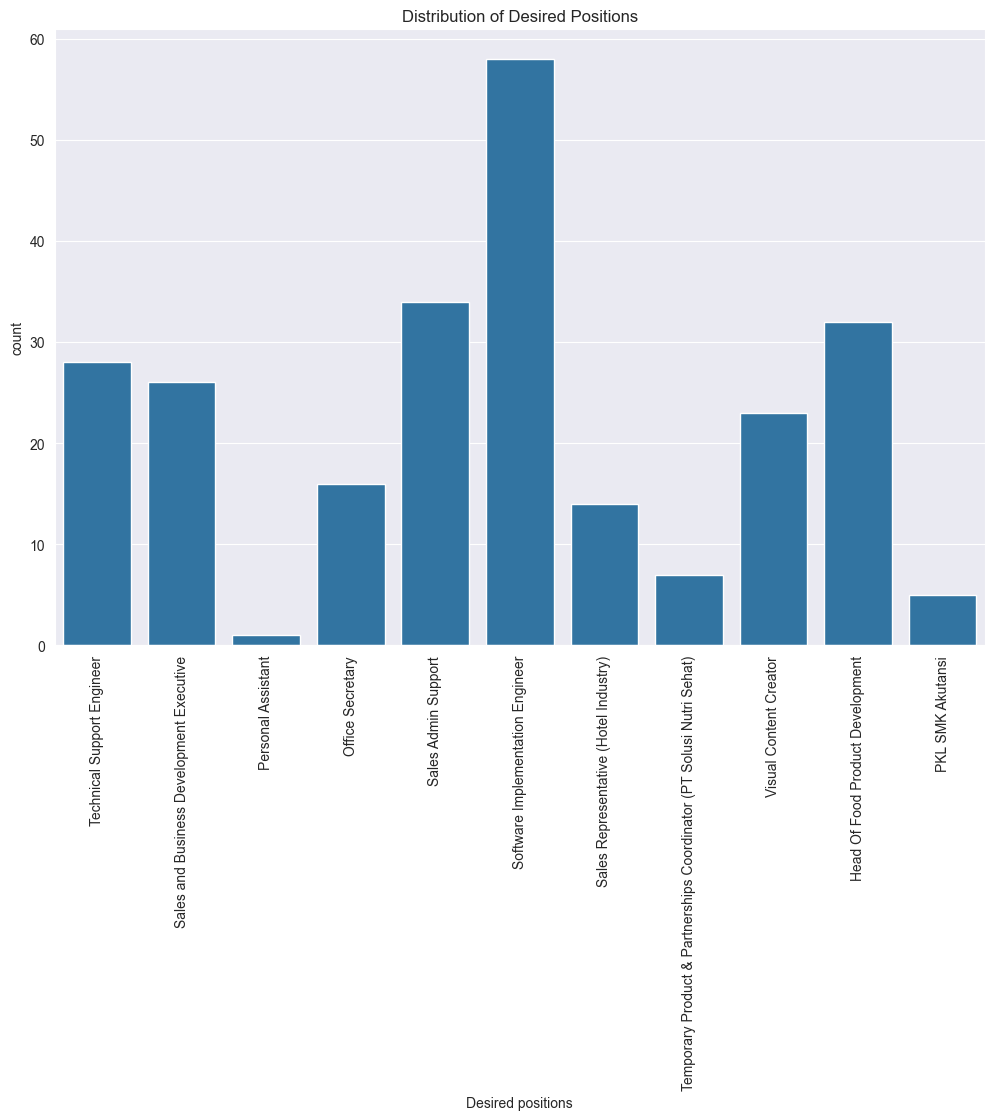

In [5]:
# Visualize key distributions
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Desired positions')
plt.xticks(rotation=90)
plt.title('Distribution of Desired Positions')
plt.show()

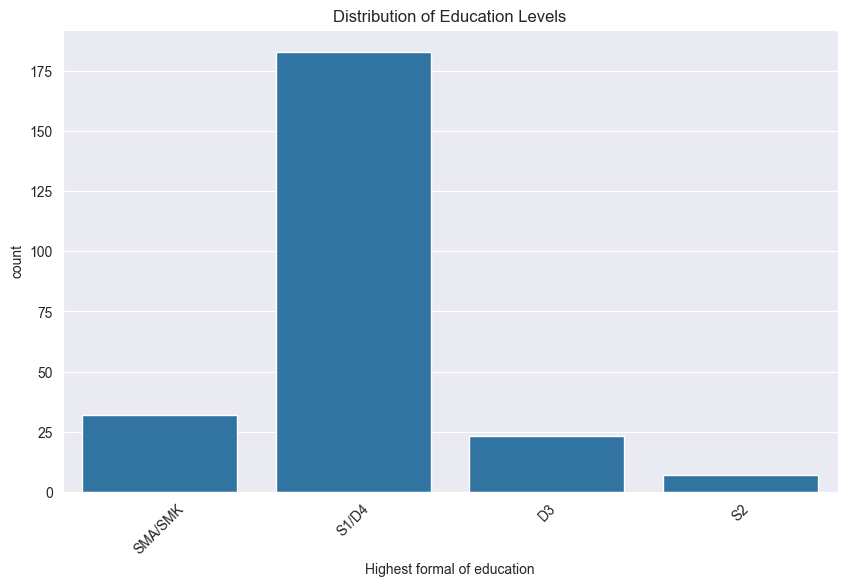

In [6]:
# Analyze education levels
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Highest formal of education')
plt.xticks(rotation=45)
plt.title('Distribution of Education Levels')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [7]:
# Handle missing values
numerical_features = ['Expected salary (IDR)']
categorical_features = ['Gender', 'Marital status', 'Highest formal of education',
                       'Current status', 'Experience']
text_features = ['Faculty/Major', 'Desired positions']

In [8]:
def clean_text(text):
    if pd.isna(text):
        return ""
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower().strip()
    return text

for col in text_features:
    df[col] = df[col].apply(clean_text)


In [9]:
# Create preprocessing pipelines
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', Pipeline([
#             ('imputer', SimpleImputer(strategy='median')),
#             ('scaler', StandardScaler())
#         ]), numerical_features),
#         ('cat', Pipeline([
#             ('imputer', SimpleImputer(strategy='most_frequent')),
#             ('onehot', OneHotEncoder(handle_unknown='ignore'))
#         ]), categorical_features)
#     ],
#     remainder='drop'
# )

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])



In [10]:
X_preprocessed = preprocessor.fit_transform(df)
feature_names = preprocessor.get_feature_names_out()

# Optional: feature selection
selector = SelectKBest(score_func=f_classif, k='all')
X_selected = selector.fit_transform(X_preprocessed, np.random.randint(0, 2, X_preprocessed.shape[0]))  # Dummy target

X_selected.shape

(245, 16)

In [11]:
df_text = df[text_features].fillna('')
combined_text = df_text[text_features].agg(' '.join, axis=1)

tfidf = TfidfVectorizer(stop_words='english')
X_text = tfidf.fit_transform(combined_text)

X_text.shape

(245, 161)

In [12]:
# Save and export the processed dataset
# processed_df = pd.DataFrame(preprocessor.fit_transform(df))
# processed_df.to_csv('dataset/career_form_processed.csv', index=False)
os.makedirs('preprocessing/dataset', exist_ok=True)

np.save('preprocessing/dataset/processed_data.npy', X_selected)
df[['Desired positions']].to_csv('preprocessing/dataset/target_data.csv', index=False)

with open('preprocessing/dataset/feature_names.txt', 'w') as f:
    for name in feature_names:
        f.write(f"{name}\n")

joblib.dump(preprocessor, 'preprocessing/dataset/preprocessor_pipeline.pkl')
joblib.dump(tfidf, 'preprocessing/dataset/tfidf_vectorizer.pkl')

print("✅ Preprocessing selesai dan disimpan.")


✅ Preprocessing selesai dan disimpan.
